## 과제: 100개의 임의 점 좌표에 대해 5-최근접 이웃 구하기 및 시각화

#### 과제 설명
#### 1. 목표: 100개의 임의의 2차원 좌표에 대해 각 점의 5-최근접 이웃을 찾아 시각화하는 프로그램을 작성.

#### 2. 조건:
거리: 유클리드 거리 제곱을 사용하여 각 점 간의 거리를 계산.
출력: 각 점에 대해 가장 가까운 5개의 이웃 좌표를 출력.
시각화: 각 좌표와 해당 좌표에 가까운 5개의 이웃을 스캐터 플롯으로 시각화. (점마다 이웃 관계를 선으로 연결하여 표시)


#### 3. 단계별 요구 사항


##### 3.1 난수 좌표 생성:
[0, 1) 범위에서 100개의 2차원 좌표를 생성.

In [9]:
def desc(X):
    print(X.shape, X.size, X.dtype)

In [12]:
import numpy as np

data = np.random.rand(100, 2)
desc(data)

(100, 2) 200 float64


##### 3.2 거리 행렬 계산:
각 점 간의 유클리드 거리 제곱을 계산하여 100x100 크기의 거리 행렬을 생성.



In [31]:
dist_sq = np.sum((data[:,np.newaxis,:] -data[np.newaxis,:,:]) **2, axis=-1)
desc(dist_sq)
print(dist_sq)

(100, 100) 10000 float64
[[0.         1.31373472 0.16613487 ... 0.83017875 1.1107047  0.65433066]
 [1.31373472 0.         0.74373568 ... 0.19183496 0.06101067 0.32235336]
 [0.16613487 0.74373568 0.         ... 0.61210998 0.50498149 0.17225351]
 ...
 [0.83017875 0.19183496 0.61210998 ... 0.         0.32660069 0.50342633]
 [1.1107047  0.06101067 0.50498149 ... 0.32660069 0.         0.12181469]
 [0.65433066 0.32235336 0.17225351 ... 0.50342633 0.12181469 0.        ]]


##### 3.3 5-최근접 이웃 찾기:
각 점에 대해 가장 가까운 5개의 점을 거리 순으로 정렬.
자기 자신을 제외하고 가장 가까운 5개의 이웃.


In [19]:
nearest = np.argsort(dist_sq, axis=1)
desc(nearest)
print(nearest)

k = 5
nearest_partition = np.argpartition(dist_sq, k+1, axis=1)
desc(nearest_partition)
print(nearest_partition)

(100, 100) 10000 int64
[[ 0 73 52 ...  3 26  1]
 [ 1 14  3 ...  0 73 52]
 [ 2 88 40 ... 20 26  1]
 ...
 [97 20 95 ... 72 35 45]
 [98 83 43 ...  0 52 73]
 [99 90 94 ... 73 57 47]]
(100, 100) 10000 int64
[[ 0 73 52 ...  3 26  1]
 [ 1 14  3 ...  0 73 52]
 [ 2 88 40 ... 20 26  1]
 ...
 [97 20 95 ... 72 35 45]
 [98 83 43 ...  0 52 73]
 [99 90 94 ... 73 57 47]]



##### 3.4 결과 출력:
각 점에 대해 가장 가까운 5개의 이웃의 좌표와 거리 제곱을 출력.



In [38]:
nearest_partition[0, :k+1]

for i in range(data.shape[0]):
    for j in nearest_partition[i, 1:k+1]:   
        print("[",i, "] 이웃 좌표 :",data[j], ", 거리 :", dist_sq[i][j])

[ 0 ] 이웃 좌표 : [0.88662195 0.95712584] , 거리 : 0.0027919903902550672
[ 0 ] 이웃 좌표 : [0.86403957 0.97487231] , 거리 : 0.00484615081289108
[ 0 ] 이웃 좌표 : [0.85849048 0.80434171] , 거리 : 0.010545763607113316
[ 0 ] 이웃 좌표 : [0.70813057 0.98080711] , 거리 : 0.032987501007724324
[ 0 ] 이웃 좌표 : [0.87217547 0.71689684] , 거리 : 0.035730695210504114
[ 1 ] 이웃 좌표 : [0.1881619  0.08199568] , 거리 : 0.00611451174570163
[ 1 ] 이웃 좌표 : [0.15137382 0.08819336] , 거리 : 0.0063235041851759785
[ 1 ] 이웃 좌표 : [0.10665621 0.07154894] , 거리 : 0.006722418237106625
[ 1 ] 이웃 좌표 : [0.19544265 0.09796135] , 거리 : 0.00916225039474379
[ 1 ] 이웃 좌표 : [0.29569583 0.14424519] , 거리 : 0.036723570251772114
[ 2 ] 이웃 좌표 : [0.53281018 0.82206902] , 거리 : 0.003214323421955167
[ 2 ] 이웃 좌표 : [0.50813066 0.86099936] , 거리 : 0.0034570999486522565
[ 2 ] 이웃 좌표 : [0.46659885 0.72271202] , 거리 : 0.007905626231588221
[ 2 ] 이웃 좌표 : [0.54199694 0.73463153] , 거리 : 0.01002826175972895
[ 2 ] 이웃 좌표 : [0.49299359 0.68282422] , 거리 : 0.016675745130006425
[ 3 ] 이웃 좌표

##### 3.5 시각화:
matplotlib를 사용하여 각 점과 해당 점의 5-최근접 이웃을 플롯.
각 점은 scatter로 표시하고, 가까운 이웃과 연결하는 선을 추가하여 관계를 시각적으로 표현.

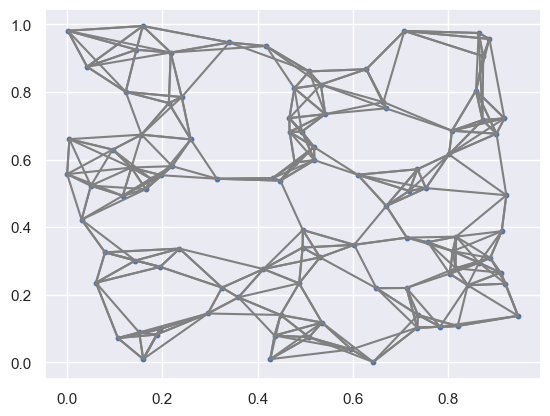

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  

plt.scatter(data[:,0], data[:,1], s=10)

for i in range(data.shape[0]):
    for j in nearest_partition[i, :k+1]:    
        plt.plot(*zip(data[j],data[i]), color="gray")